In [246]:
from sklearn import model_selection, datasets, linear_model, metrics
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
import seaborn as sns
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.


<BarContainer object of 101 artists>

(50, 100)

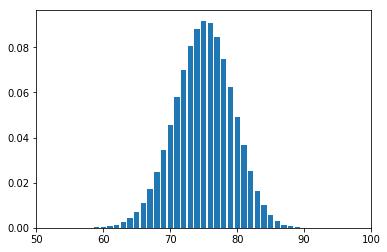

p-value equals to 0.0822


In [237]:
p = 0.75
n = 100
rv = stats.binom(n, p)
x = np.linspace(0,100,101)
# plot distribution of binomial random variable
plt.bar(x, rv.pmf(x), align = 'center')
plt.xlim(50, 100) 
plt.show()
print('p-value equals to %.4f' % stats.binom_test(67, n, p))    

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [248]:
data = pd.read_table('pines.txt')
data.head()


C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [249]:
data.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


C:\Users\1\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


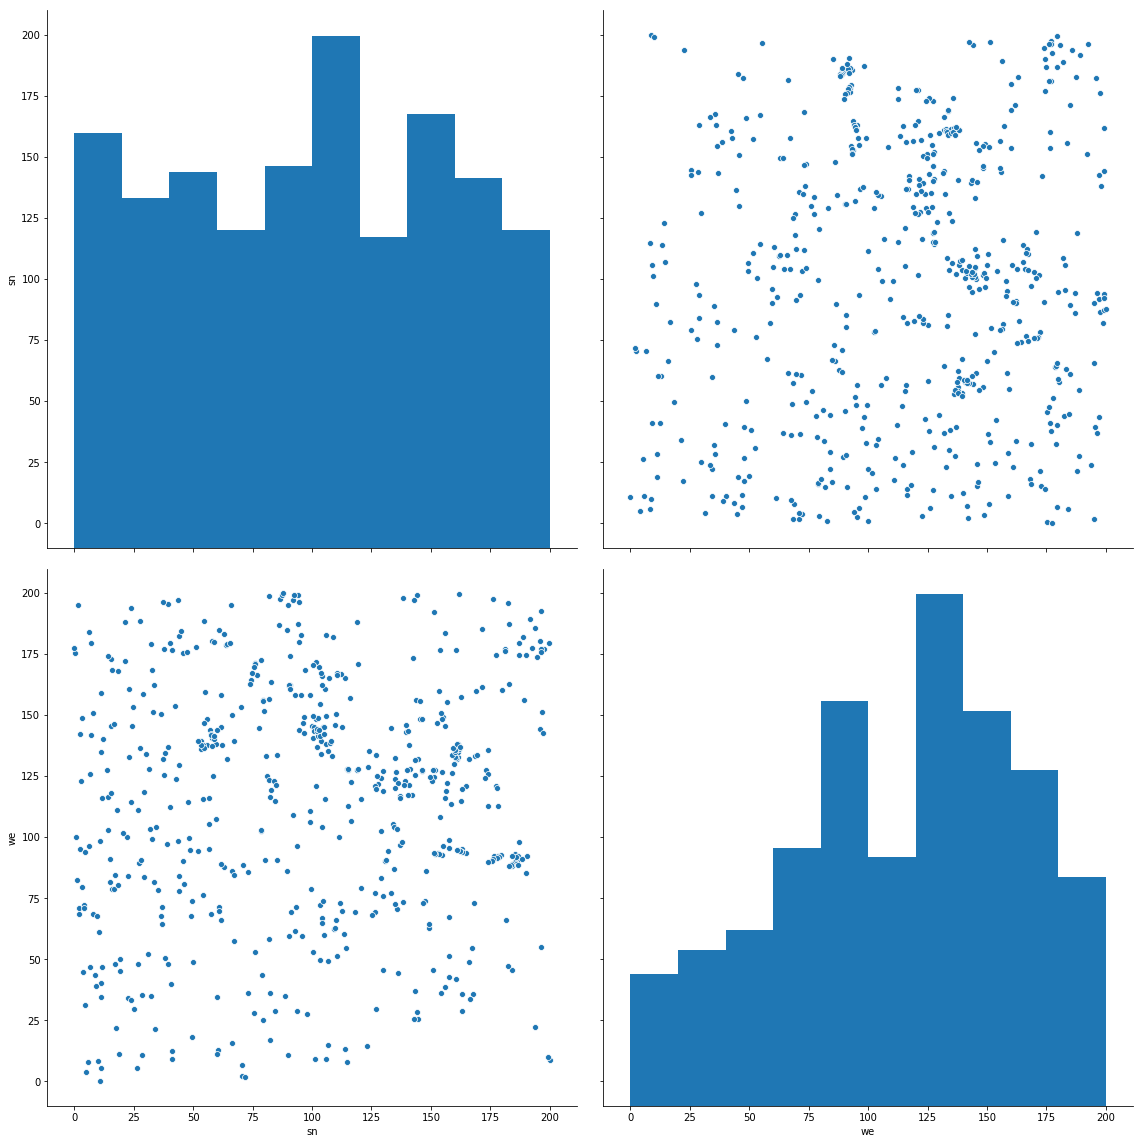

In [252]:
sns.pairplot(data, size=8)

In [253]:
sn_coor = data.sn
we_coor = data.we

In [278]:
statistic = stats.binned_statistic_2d(sn_coor, we_coor, values=None, statistic='count', bins = [5, 5])
observed_frequencies = statistic[0]
observed_frequencies


array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [279]:
print('The expectation for each square equals to %.2f' % np.mean(np.ravel(result)))

The expectation for each square equals to 23.36


Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

<BarContainer object of 25 artists>

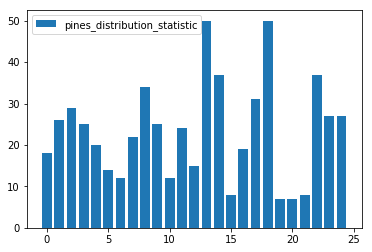

In [280]:
plt.bar(range(25), np.ravel(observed_frequencies), label='pines_distribution_statistic')
plt.legend()

In [289]:
print('p-value equals to %.2f' % stats.chisquare(observed_frequencies.ravel(), ddof=0)[1])

# according to p-value hypothesis about uniform distribution is wrong

p-value equals to 0.00


(0    51.62804
 dtype: float64, 0    85.09196
 dtype: float64)

AttributeError: 'file' object has no attribute 'location'